# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원 정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기
- 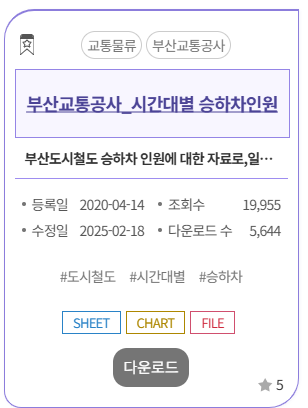

In [1]:
import pandas as pd
file_path = "./ref/일별역별시간대별승하차인원(2025년1월).csv"
df = pd.read_csv(file_path,encoding="EUC-KR")
df.head() #맨 앞데이터 5개 들고오기
#data.tail() #맨 뒤데이터 5개 들고오기

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,95,다대포해수욕장,2025-01-01,수,승차,8126,0,1,0,14,...,527,498,517,266,170,98,79,38,10,0
1,95,다대포해수욕장,2025-01-01,수,하차,7674,0,1,0,0,...,376,357,295,185,132,81,74,50,71,46
2,95,다대포해수욕장,2025-01-02,목,승차,4893,1,0,0,21,...,472,364,373,210,159,87,90,57,13,0
3,95,다대포해수욕장,2025-01-02,목,하차,3965,1,4,0,1,...,311,339,296,321,239,143,99,92,82,49
4,95,다대포해수욕장,2025-01-03,금,승차,4572,0,0,0,27,...,401,300,363,237,139,102,70,69,13,0


In [2]:
columns0 = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}h"for i in range(1,24)]
columns = columns0 + time_col + ["24h~01h"]
df.columns = columns
df = df.loc[:,:"total"]

In [3]:
df

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572
...,...,...,...,...,...,...
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898


In [14]:
data = df.groupby(['num','name','date']).sum()#.reset_index()
data
#groupby는 특정 기준으로 그룹화를 시켜주는 것이다.
#뒤에 붙은 sum은 같은 값을 하나로 합쳐주는데 지금은 역 이름을 합치고 있다.
#reset_index는 합쳐져 있는 값이나 다른값을 다시 인덱스화 시키는걸말한다.

week  type  total
num name    date                        
95  다대포해수욕장 2025-01-01   수수  승차하차  15800
            2025-01-02   목목  승차하차   8858
            2025-01-03   금금  승차하차   8279
            2025-01-04   토토  승차하차   8477
            2025-01-05   일일  승차하차   6912
...                     ...   ...    ...
414 안평      2025-01-27   월월  승차하차   2716
            2025-01-28   화화  승차하차   1987
            2025-01-29   수수  승차하차   1633
            2025-01-30   목목  승차하차   2037
            2025-01-31   금금  승차하차   3671

[3472 rows x 3 columns]

In [6]:
gdata = data[["name","date","total"]]
gdata = gdata.sort_values(by=["name","date"], ascending=[True,True])
gdata.head(10)
#sort_values는 값을 설정하고 설정한 값을 기준대로 나열한다. 
#ascending은 오름차순과 내림차순을 정할 수 있고 True는 오름차순, False는 내림차순이다.

,name,date,total
1860,가야,2025-01-01,3953
1861,가야,2025-01-02,7242
1862,가야,2025-01-03,7293
1863,가야,2025-01-04,5609
1864,가야,2025-01-05,3945
1865,가야,2025-01-06,7469
1866,가야,2025-01-07,7217
1867,가야,2025-01-08,7324
1868,가야,2025-01-09,7110
1869,가야,2025-01-10,7052


In [8]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[["name",'total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [9]:
sdata = tdata.sort_values(by="total",ascending=[False])
sdata.head(10)

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

In [ ]:
for font in fm.findSystemFonts():
    print(font)
#print(plt.rcParams["font.family"])

In [58]:
!pip install squarify

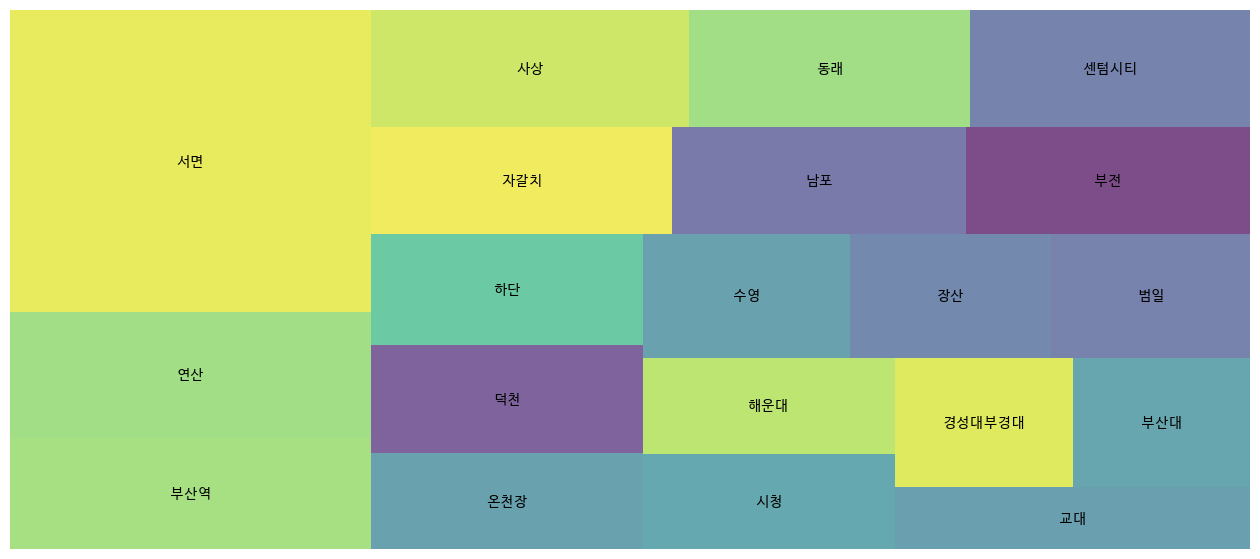

In [13]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=sdata["total"].iloc[:20],label=sdata["name"].iloc[:20],alpha=0.7)
plt.rcParams['font.size'] = 22
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

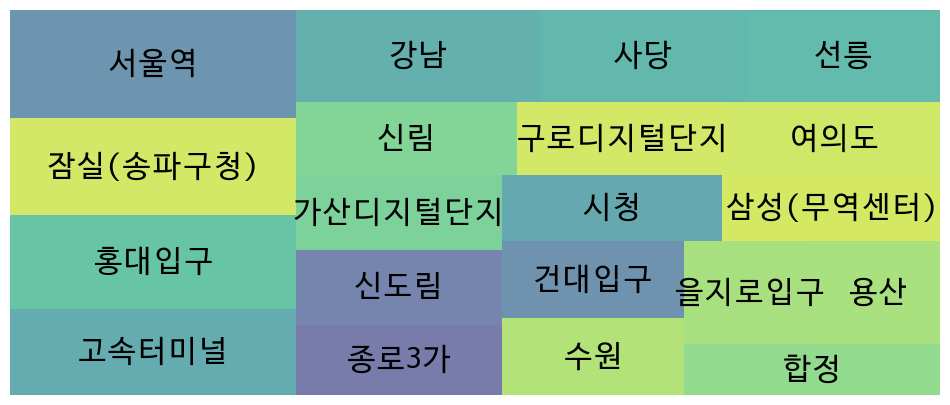

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify
import pandas as pd

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

file_path = "./ref/CARD_SUBWAY_MONTH_202501.csv"
df = pd.read_csv(file_path)
columns = ['name','subway','in','out','day','etx']
df.columns = columns
df = df.loc[:,:"in"]
mdata = df.groupby(by="subway").sum().reset_index()
tdata = mdata[["subway",'in']]
tdata
idata = tdata.sort_values(by="in",ascending=[False])
idata.head(10)
plt.figure(figsize=(12,5))
squarify.plot(sizes=idata["in"].iloc[:20],label=idata["subway"].iloc[:20],alpha=0.7)
plt.rcParams['font.size'] = 22
plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("subwat01.png")
plt.show()